In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("bird_dino_data.csv")
#df.head()

In [125]:
#create new column with the whole brain 
df ["Whole Brain (cm3)"] = df["Olfactory bulbs (cm3)"]+ df["Cerebrum (cm3)"]+ 
    df["Optic Lobes (cm3)"]+ df["Cerebellum (cm3)"]
#df.head()

In [126]:
#whole brain to body ratio column 1cm3=1g
df["Brain to Body Ratio (cm3)"]= df["Whole Brain (cm3)"]/ df["Body Mass (kg)"]/1000
#df.head()

In [127]:
#cerebrum to whole brain ratio column 
df["Cerebrum/Whole Brain"]= df["Cerebrum (cm3)"]/ df["Whole Brain (cm3)"]
df.head()

,Species ID,Bird vs Dino,Body Mass (kg),Olfactory bulbs (cm3),Cerebrum (cm3),Optic Lobes (cm3),Cerebellum (cm3),Brain Stem (cm3),Whole Brain (cm3),Brain to Body Ratio (cm3),Cerebrum/Whole Brain
0,1,B,0.02,0.009,1.53,0.20,0.16,0.06,1.899,0.094950,0.805687
1,2,B,1.26,0.006,16.81,2.84,1.70,0.68,21.356,0.016949,0.787132
2,3,B,2.18,0.026,11.08,1.95,0.89,1.15,13.946,0.006397,0.794493
3,4,D,0.25,0.050,0.41,0.16,0.09,0.12,0.710,0.002840,0.577465
4,5,B,0.01,0.003,1.57,0.20,0.34,0.08,2.113,0.211300,0.743019


In [128]:
#seperate based on animal 
B= df.loc[df["Bird vs Dino"]== "B"]
D= df.loc[df["Bird vs Dino"]== "D"]

In [129]:
#find bird and dino average for both ratios 
B_brain2body= B["Brain to Body Ratio (cm3)"].mean()
print(B_brain2body)
D_brain2body= D["Brain to Body Ratio (cm3)"].mean()
print(D_brain2body)
B_cerebrum2brain= B["Cerebrum/Whole Brain"].mean()
print(B_cerebrum2brain)
D_cerebrum2brain= D["Cerebrum/Whole Brain"].mean()
print(D_cerebrum2brain)

0.045170238698633944
0.0014002983908859297
0.7094430277327214
0.5479339483969496


In [130]:
#find brain/body mass and cerebrum/brain for our brain 
#function- femur length in mm
#output in kg
def convert(dino_type, femur_length):
    if dino_type== "ornithischian":
        return 10**(3.0587*np.log10(femur_length)-2.7042)/1000
    elif dino_type== "sauropod":
        return 10**(2.3459*np.log10(femur_length)-0.2935)/1000
    elif dino_type== "theropod":
        return 10**(3.1854*np.log10(femur_length)-3.184)/1000

In [131]:
convert("theropod", 21)

0.010660985224533874

In [132]:
#unit- cm 
X_body= convert("theropod", 21)
X_olfactory= 0.3
X_cerebrum= 2.1
X_optic= 1.5
X_cerebellum= 0.6
X_wbw= X_olfactory + X_cerebrum + X_optic + X_cerebellum
#unit- cubic cm
X_brain= 2.2

In [133]:
print(X_wbw)

4.5


In [134]:
X_body_g= X_body*1000
print(X_body_g)

10.660985224533874


In [135]:
X_brain2body= (X_brain/X_body_g)
print(X_brain2body)

0.20635991455435018


In [136]:
X_cerebrum2brain= X_cerebrum/X_wbw
print(X_cerebrum2brain)

0.4666666666666667


In [137]:
#compare to averages
def compare(fl, bv, cw, wbw):
    mass = convert("theropod", fl)
    brain2body = wbw/mass*1000
    cerebrum2brain = cw/wbw
    if abs(brain2body-B_brain2body)> abs(brain2body-D_brain2body):
         B2B_ans = "Dino"
    else:
        B2B_ans = "Bird"
    
    if abs(cerebrum2brain-B_cerebrum2brain)> abs(cerebrum2brain-D_cerebrum2brain):
        C2B_ans = "Dino"
    else:
        C2B_ans ="Bird"
    return [B2B_ans, C2B_ans]

In [138]:
print(compare(2.1, 2.2, 2.1, 4.5))

['Bird', 'Dino']


In [139]:
print(X_brain2body-B_brain2body)
print(X_cerebrum2brain-D_cerebrum2brain)

0.16118967585571625
-0.08126728173028297


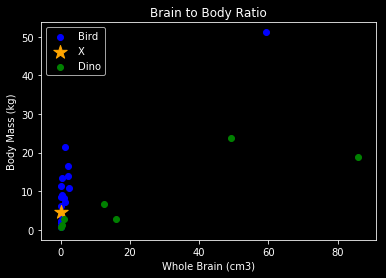

In [151]:
plt.style.use("dark_background")
plt.scatter(B["Body Mass (kg)"], B["Whole Brain (cm3)"], color = "blue", label = "Bird")
plt.scatter(X_body, X_wbw, color = "orange", label = "X", marker= "*", s=200)
plt.scatter(D["Body Mass (kg)"], D["Whole Brain (cm3)"], color = "green", label = "Dino")
plt.title("Brain to Body Ratio")
plt.legend(loc= "upper left")
plt.xlabel("Whole Brain (cm3)")
plt.ylabel("Body Mass (kg)")
plt.show()

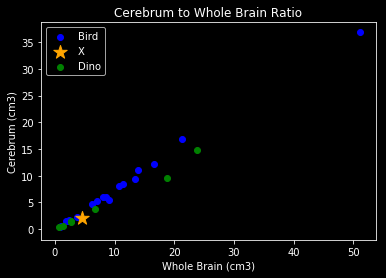

In [152]:
plt.style.use("dark_background")
plt.scatter(B["Whole Brain (cm3)"], B["Cerebrum (cm3)"], color = "blue", label = "Bird")
plt.scatter(X_wbw, X_cerebrum, color = "orange", label = "X", marker= "*", s=200)
plt.scatter(D["Whole Brain (cm3)"], D["Cerebrum (cm3)"], color = "green", label = "Dino")
plt.xlabel("Whole Brain (cm3)")
plt.ylabel("Cerebrum (cm3)")
plt.title("Cerebrum to Whole Brain Ratio")
plt.legend()
plt.show()

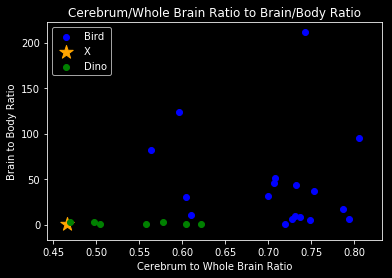

In [153]:
plt.style.use("dark_background")
plt.scatter(B["Cerebrum (cm3)"]/B["Whole Brain (cm3)"], B["Whole Brain (cm3)"]/ B["Body Mass (kg)"], 
            color = "blue", label = "Bird")
plt.scatter(X_cerebrum2brain, X_brain2body, color = "orange", label = "X", marker= "*", s=200)
plt.scatter(D["Cerebrum (cm3)"]/D["Whole Brain (cm3)"], D["Whole Brain (cm3)"]/ D["Body Mass (kg)"], 
            color = "green", label = "Dino")
plt.xlabel("Cerebrum to Whole Brain Ratio")
plt.ylabel("Brain to Body Ratio")
plt.title("Cerebrum/Whole Brain Ratio to Brain/Body Ratio")
plt.legend(loc= "upper left")
plt.show()